# Project Planning Stage (Individual)

For this project, I will be working with log data from a Minecraft server
about the players and the sessions played on the Minecraft server to come to a conclusion about
the question:
“Can a player's experience and age predict their average session length in the session dataset?”

In [15]:
library(tidyverse)
library(lubridate)

players <- read_csv("players.csv")

sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

In [16]:
sessions_duration <- sessions |>
    mutate(
        start = dmy_hm(start_time), end = dmy_hm(end_time),
        duration_min = as.numeric(difftime(end, start, units = "mins")))

avg_session <- sessions_duration |>
    group_by(hashedEmail) |>
    summarize(
        avg_session_mins = mean(duration_min, na.rm = TRUE),
        n_sessions = n(),
        .groups = "drop")

data_analysis <- players |>
    left_join(avg_session, by = "hashedEmail") |>
    filter(!is.na(Age), !is.na(avg_session_mins))

glimpse(data_analysis)

Rows: 123
Columns: 9
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, FALSE, TRUE, TRUE, TRU…
$ hashedEmail      <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.1, 1.6, 1.5, 0.2, 48…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Em…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Male", "Ma…
$ Age              <dbl> 9, 17, 17, 21, 21, 21, 47, 23, 25, 22, 17, 17, 19, 58…
$ avg_session_mins <dbl> 74.77778, 85.00000, 5.00000, 50.00000, 9.00000, 5.000…
$ n_sessions       <int> 27, 3, 1, 1, 1, 1, 1, 3, 1, 1, 37, 2, 2, 1, 1, 2, 1, …


# Data Description:

For this report I'm using one combined data set that comes from information about each player and information about their player sessions.

The "players" table has one row per player and it includes things like age in years and experience levels. The "sessions" table has one row per play session and records the start and end time of the session. Using the times given from the "sessions" table, I created the variable 'duration_min' that measures how long each session lasted in minutes. 

From there, I summarized this to get the average session minutes using the average session length for each player and the number of sessions they had. Then, I joined the tables together to form the variable 'data_analysis'. Players with a missing age or no recorded sessions were dropped as they had nothing to be calculated. Conclusively, most players in the 'data_analysis' were teenagers or young adults (with a few outliers). Their session lengths had variety with there being many short sessions and a few longer ones.

In [35]:
data_analysis |>
    summarize(
        mean_age = mean(Age, na.rm = TRUE),
        mean_avg_session = mean(avg_session_mins, na.rm = TRUE),
        mean_n_sessions = mean(n_sessions, na.rm = TRUE),
        mean_played_hours = mean(played_hours, na.rm = TRUE))

mean_age,mean_avg_session,mean_n_sessions,mean_played_hours
<dbl>,<dbl>,<dbl>,<dbl>
21.58537,32.85302,12.46341,9.313008


# Questions:

The *broad question* being addressed is: "How do player characteristics link to how much time someone typically spends playing on this Minecraft server?"

*Specific question*: "Can a player's experience level and age help predict their average session length (minutes)?"

The data will help me address the question of interestas the response variable will be the average session length for each player that I solved for from the session log. The explanatory variable will be age and the experience level for each player. Therefore, this question fits the data well due it connecting background information to how people use the server.

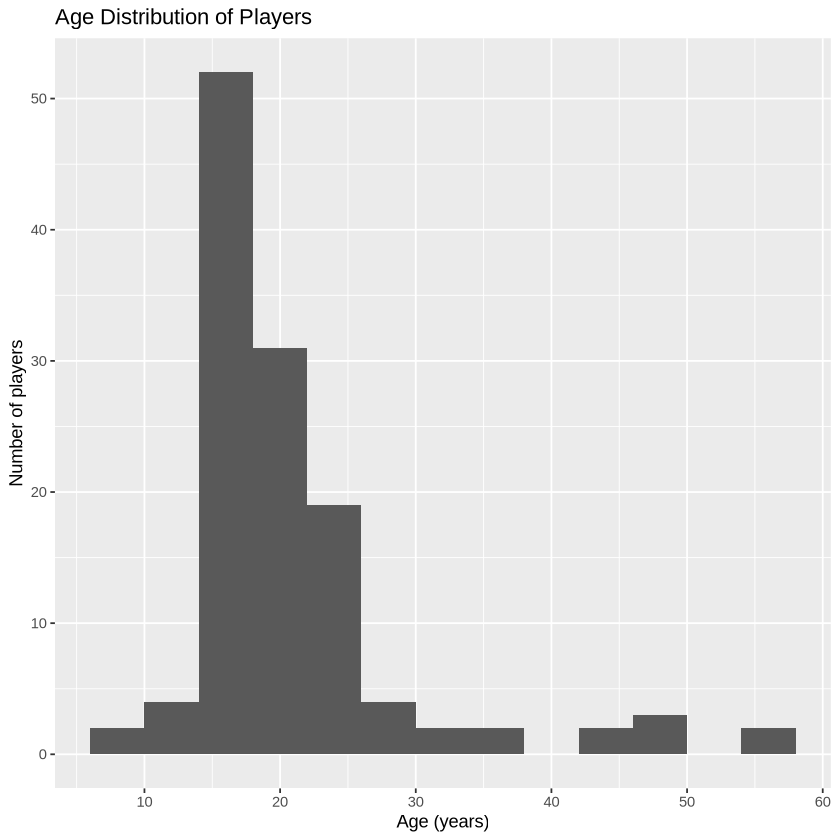

In [21]:
ggplot(data_analysis, aes(x = Age)) +
    geom_histogram(binwidth = 4) +
    labs(
        title = "Age Distribution of Players",
        x = "Age (years)",
        y = "Number of players")


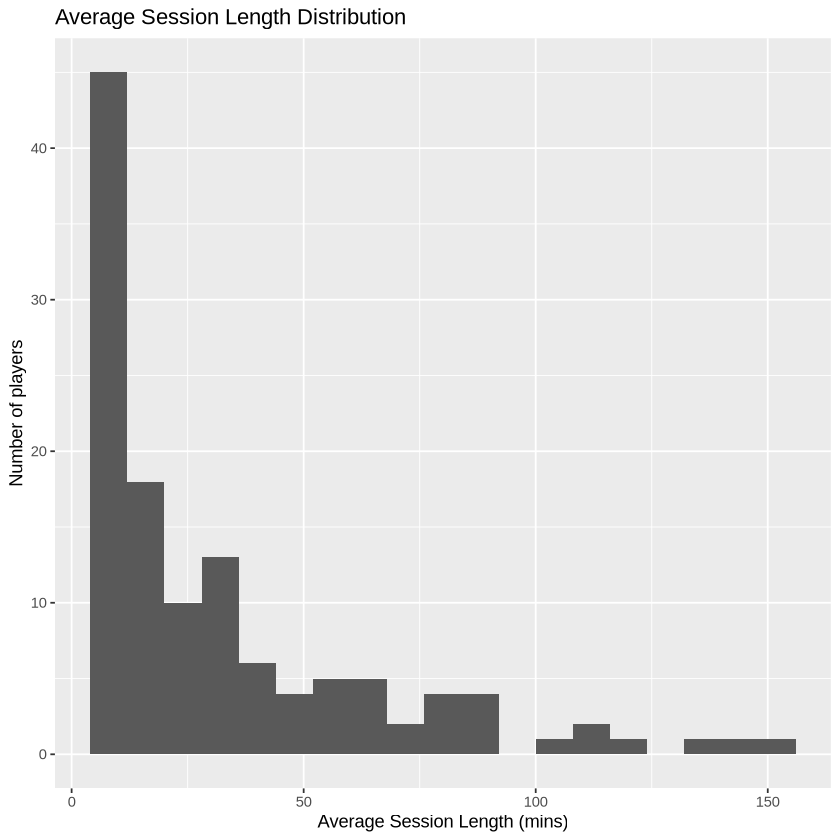

In [37]:
ggplot(data_analysis, aes(x = avg_session_mins)) +
    geom_histogram(binwidth = 8) +
    labs(
        title = "Average Session Length Distribution",
        x = "Average Session Length (mins)",
        y = "Number of players")

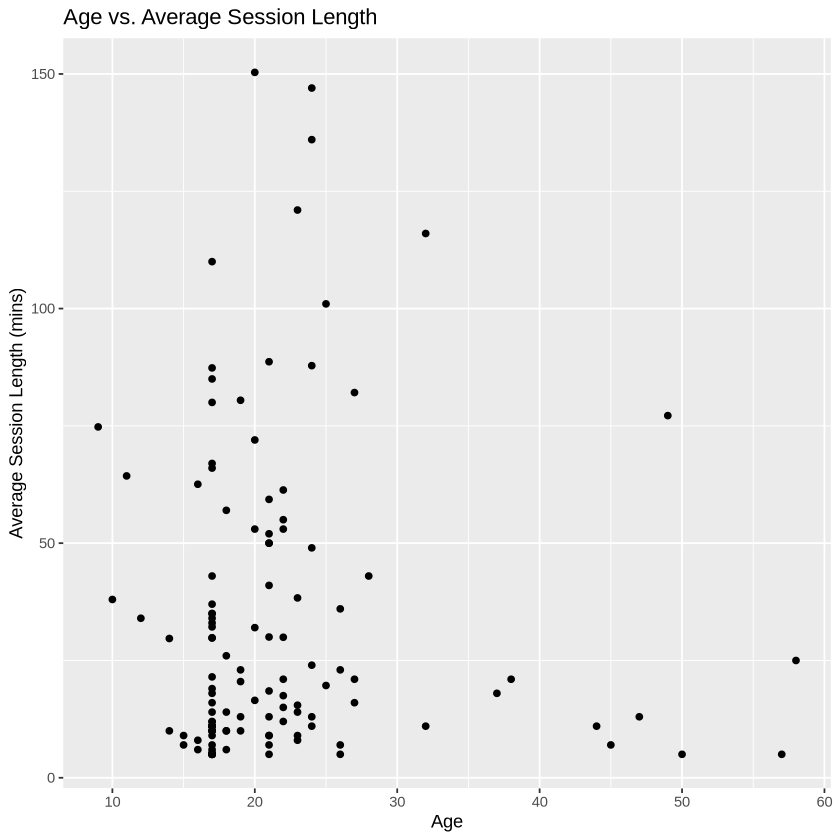

In [33]:
ggplot(data_analysis, aes (x = Age, y = avg_session_mins)) +
    geom_point() +
    labs(
        title = "Age vs. Average Session Length",
        x = "Age",
        y = "Average Session Length (mins)")

# Exploratory Data Analysis and Visualization

The histogram of the players age distribution shows that most players are in their late teens and early twenties. Separately, the histogram showing the average session length is skewed to the right meaning that most players have playing sessions that last less than 30 minutes, and there's a smaller group that has longer sessions.

The scatterplot of age vs. average session length doesn't really show any strong trends.

Overall, the plots show that experience could be more useful than age, but nothing can truly be confirmed. This makes it reasonable to think that another type of model will need to be tried later to come to a conclusion.